# Demo 07: Algorithms 03. Krylov subspace

In this demo the usage of the kylov subsapce family is explaines. This family of algorithms iterate through the eigenvectors of the residual (Ax-b) of the problems in descending order, achieving increased convergence rates as compared to the SART family. 

In cases where the data is good quality, SART type families tend to reach a better image, but when the data gets very big, or has bad qualily, CGLS is a good and fast algorithm. 

## Define geometry

In [1]:
import tigre
import numpy as np
geo = tigre.geometry(mode='cone',default=True,high_quality=False)
print(geo)

TIGRE parameters
-----
Geometry parameters
Distance from source to detector (DSD) = 1536 mm
Distance from source to origin (DSO)= 1000 mm
-----
Detector parameters
Number of pixels (nDetector) = [128 128]
Size of each pixel (dDetector) = [3.2 3.2] mm
Total size of the detector (sDetector) = [409.6 409.6] mm
-----
Image parameters
Number of voxels (nVoxel) = [64 64 64]
Total size of the image (sVoxel) = [256 256 256] mm
Size of each voxel (dVoxel) = [4. 4. 4.] mm
-----
Offset correction parameters
Offset of image from origin (offOrigin) = [0 0 0] mm
Offset of detector (offDetector) = [0 0] mm
-----
Auxillary parameters
Samples per pixel of forward projection (accuracy) = 0.5
-----
Rotation of the Detector (rotDetector) = [0 0 0] rad


## Load data and generate projections 

In [2]:
from tigre.demos.Test_data import data_loader
angles = np.linspace(0,2*np.pi,100)
head = data_loader.load_head_phantom(geo.nVoxel)
projections = tigre.Ax(head,geo,angles,'interpolated')


## Usage of CGLS

In [3]:
#  CGLS has the common 4 inputs for iterative algorithms in TIGRE:
#
#  Projections, geometry, angles, and number of iterations 
#
# Additionally it contains optional initialization tehcniques, but we
# reccomend not using them. CGLS is already quite fast and using them may
# lead to divergence.
# The options are:
#  'Init'    Describes diferent initialization techniques.
#             �  'none'     : Initializes the image to zeros (default)
#             �  'FDK'      : intializes image to FDK reconstrucition
import tigre.algorithms as algs
imgCGLS = algs.cgls(projections,geo,angles,niter=20)
imgSIRT = algs.sirt(projections,geo,angles,niter=20)

CGLS Algorithm in progress.
Esitmated time until completetion (s): 8.925535
re-initilization of CGLS called at iteration:19
Average time taken for each iteration for CGLS:0.1459274(s)
SIRT algorithm in progress.
Esitmated time until completetion (s): 4.546947


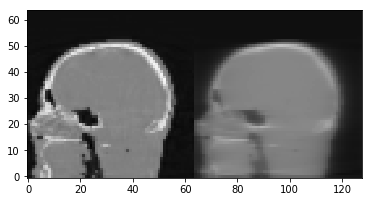

<tigre.utilities.plotimg.plotimg instance at 0x7f3b0ea1fcf8>

In [15]:
output = np.hstack((imgCGLS,imgSIRT))
tigre.plotimg(output,slice=32)

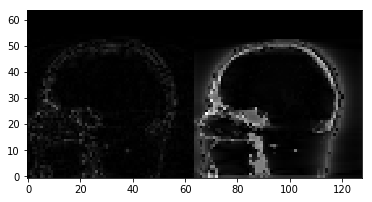

<tigre.utilities.plotimg.plotimg instance at 0x7f3b03648c68>

In [19]:
error = np.hstack((abs(imgCGLS-head), abs(imgSIRT-head)))
tigre.plotimg(error,slice=32)